In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os

### Handle File Names and Plot Function

In [45]:
root = "/home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/"
file_type = ".csv"
eval_name = lambda caption_type, recall_type: os.path.join(root ,f"{caption_type}_{recall_type}{file_type}")

#possible prefixes
human_caption = "human_captions_query"
catr_caption = "catr_captions_query"
merged_human_caption = "merged_human_caption_catr_captions_query"
merged_sequences_captions = "merged_sequences_catr_captions_query"

query_type_list = [human_caption, catr_caption, merged_human_caption, merged_sequences_captions]

#possible suffixes
fei_fei_recall = "feifei_johnson_recall"
ade20k_category_recall = "ade20k_category_recall"
feifei_recall_label = "Fei Fei /Johnson based Recall"
category_recall_label = "ADE20K Category Based Recall"


def plot_recall(df, recall_list : list = [1, 5 , 10], 
                title="Image Retrieval Performance with ADE20K pictures (50 Images gallery)",
                y_label = "ADE20K Category Based Recall",
                x_label = "Similarity Threshold"):

    mean_rank = round(df['mean_rank'][0], 2)
    average_similarity = round(df['average_similarity'][0]*100, 2)
    for r in recall_list:
        column_name = f"recall_at_{r}"
        if column_name in df.columns:
            plt.plot(df["threshold"][1:], df[f"recall_at_{r}"][1:], label=f"@{r}")
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(f"{title}\nMean Rank gold recommendation:{mean_rank}\nAverage Similarity gold Recommendation: {average_similarity}%")
    plt.legend(loc='best')
    plt.show()

def read_frame(name):
    print("Opening:", file_name)
    df = pd.read_csv(name, sep=",", header=0)
    return df.drop(df.columns[0], axis=1)

# I) Baseline System with Sentence-Bert

## ADE20K Metrics (Gallery Size of 50 Images)

### Recall as Fei Fei Johnson

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/human_captions_query_feifei_johnson_recall.csv


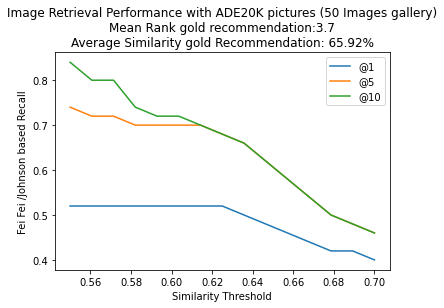

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/catr_captions_query_feifei_johnson_recall.csv


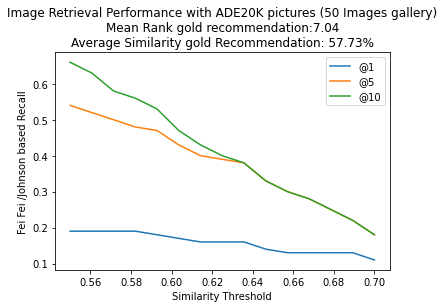

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


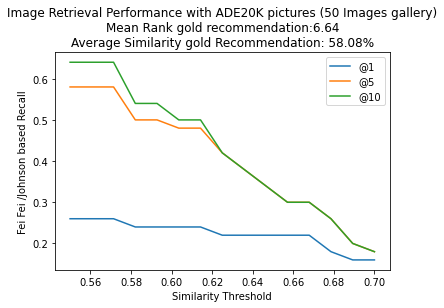

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_sequences_catr_captions_query_feifei_johnson_recall.csv


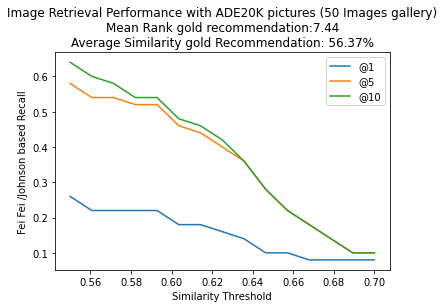

In [24]:
for query_type in query_type_list:
    file_name = eval_name(query_type, fei_fei_recall)
    df = read_frame(file_name)
    plot_recall(df, y_label=feifei_recall_label)

### Recall Based on ADE20K Categories

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/human_captions_query_ade20k_category_recall.csv


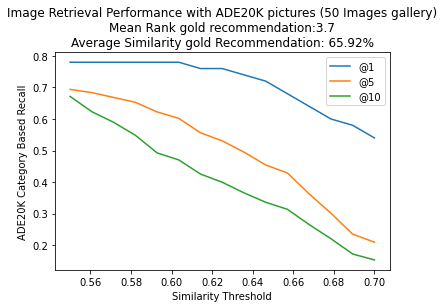

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/catr_captions_query_ade20k_category_recall.csv


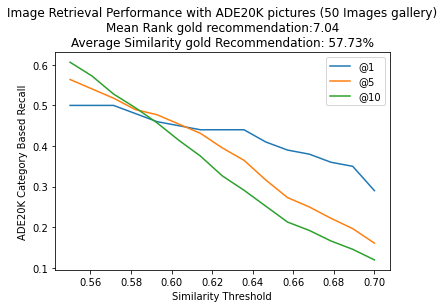

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_human_caption_catr_captions_query_ade20k_category_recall.csv


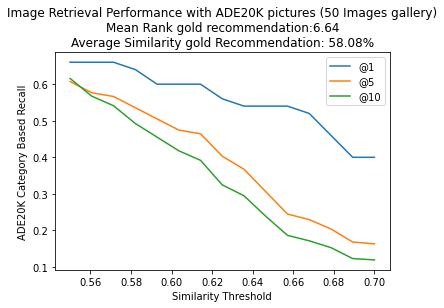

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_sequences_catr_captions_query_ade20k_category_recall.csv


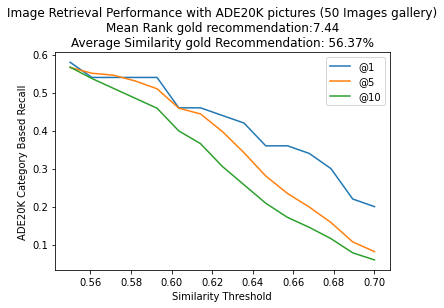

In [25]:
for query_type in query_type_list:
    file_name = eval_name(query_type, ade20k_category_recall)
    df = read_frame(file_name)
    plot_recall(df, y_label=category_recall_label)
# Explanation why the recall @10 and @20 are the same? Short answer: the gallery for retrieval is just too small 
# Long Answer:
# Well, we only consider certains values over a threshold
# but we also consider as relevant the number of a given category for a test.
# for example if I only have the 5 images of a bathroom , if I consider recall at 10 or 20, it doesn't matter much, 
# all the relevant have been picked during the recall @5 it does not influence the score at 10 or 20, as we can't
# retrieve 10 or 20 bathroom pictures. The only to see other differences would be to set higher threshold values.

## Visual Genome Metrics (Images also contained in MSCOCO)

### Recall as Fei Fei Johnson

#########################################################################

GALLERY SIZE 50.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_50_human_captions_query_feifei_johnson_recall.csv


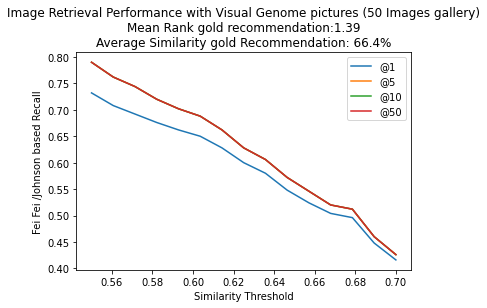

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_50_catr_captions_query_feifei_johnson_recall.csv


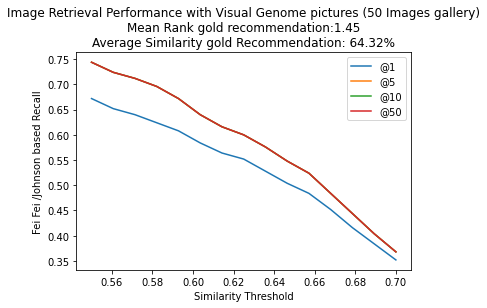

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_50_merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


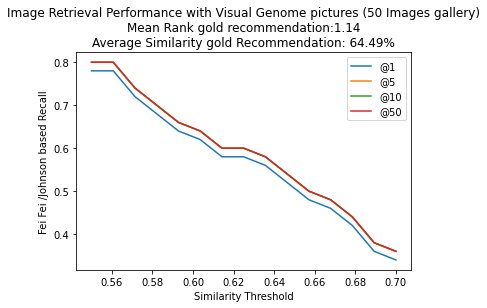

#########################################################################

GALLERY SIZE 150.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_150_human_captions_query_feifei_johnson_recall.csv


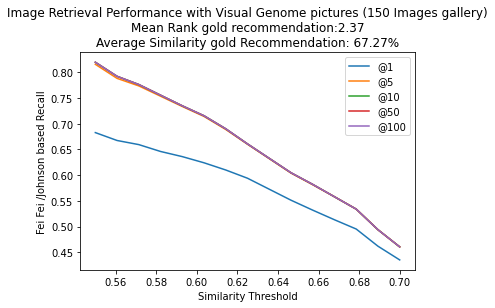

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_150_catr_captions_query_feifei_johnson_recall.csv


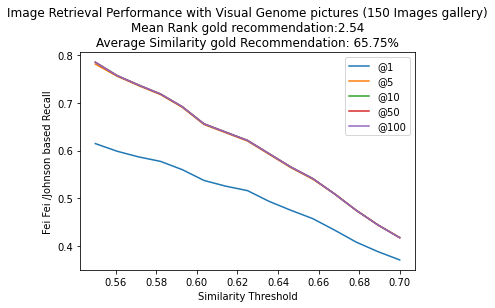

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_150_merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


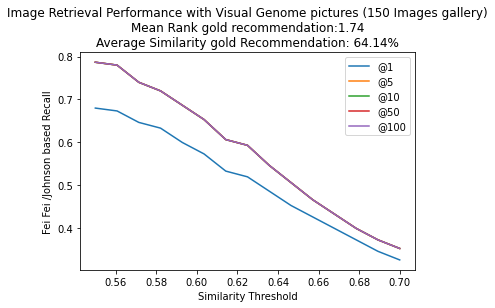

#########################################################################

GALLERY SIZE 1000.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_human_captions_query_feifei_johnson_recall.csv


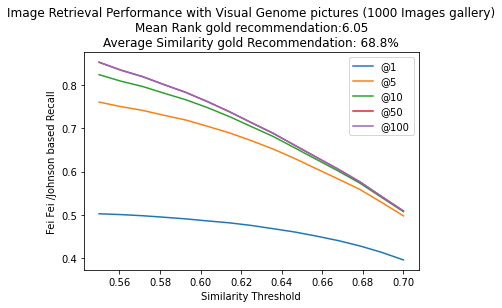

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_catr_captions_query_feifei_johnson_recall.csv


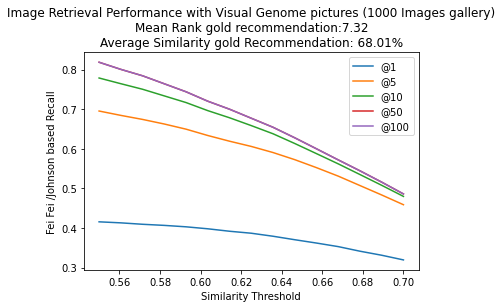

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


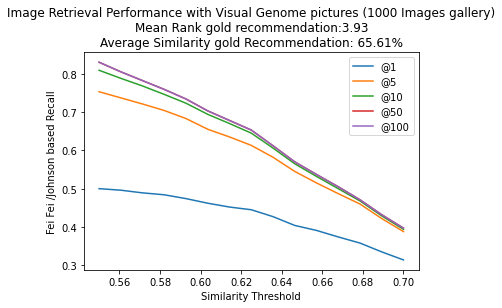

#########################################################################

GALLERY SIZE 5000.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_human_captions_query_feifei_johnson_recall.csv


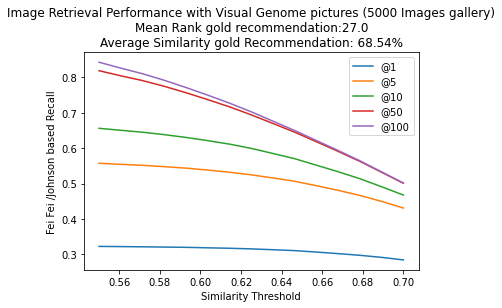

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_catr_captions_query_feifei_johnson_recall.csv


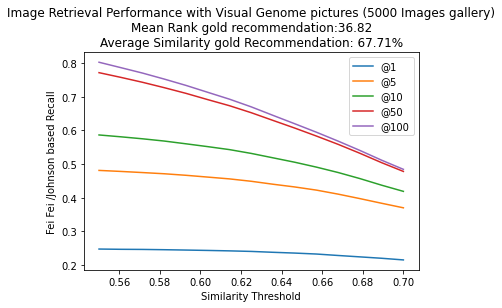

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


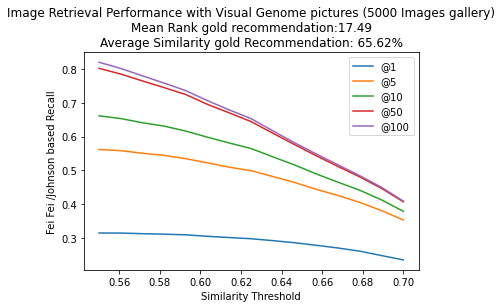

In [59]:


vg_human_caption = lambda gallery_size: f"vg_{gallery_size}_human_captions_query"
vg_catr_caption = lambda gallery_size: f"vg_{gallery_size}_catr_captions_query"
vg_merged_human_caption = lambda gallery_size: f"vg_{gallery_size}_merged_human_caption_catr_captions_query"

get_query_type_list = lambda gallery_size: [vg_human_caption(gallery_size), vg_catr_caption(gallery_size), vg_merged_human_caption(gallery_size)]

#TODO 50 and 5000
gallery_size_list = [50, 150, 1000, 5000]

for size in gallery_size_list:
    print("#########################################################################\n")
    query_type_list = get_query_type_list(size)
    print(f"GALLERY SIZE {size}.\n")
    for query_type in query_type_list:
        title=f"Image Retrieval Performance with Visual Genome pictures ({size} Images gallery)"
        file_name = eval_name(query_type, fei_fei_recall)
        df = read_frame(file_name)
        plot_recall(df, y_label=feifei_recall_label, recall_list=[1, 5,  10, 50, 100], title=title)


# 2) Scene Graph Based System

## Visual Genome Metrics (Images also contained in MSCOCO)

### Recall as Fei Fei Johnson

#########################################################################

GALLERY SIZE 50.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_50_graph_query_feifei_johnson_recall.csv


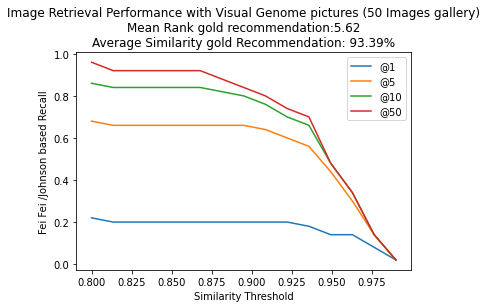

#########################################################################

GALLERY SIZE 150.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_150_graph_query_feifei_johnson_recall.csv


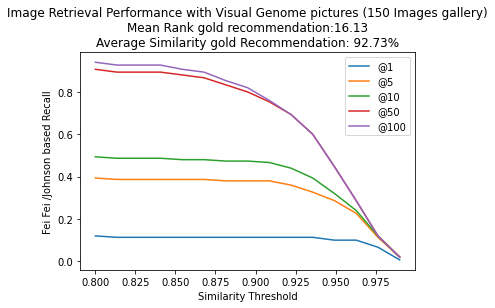

#########################################################################

GALLERY SIZE 1000.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_graph_query_feifei_johnson_recall.csv


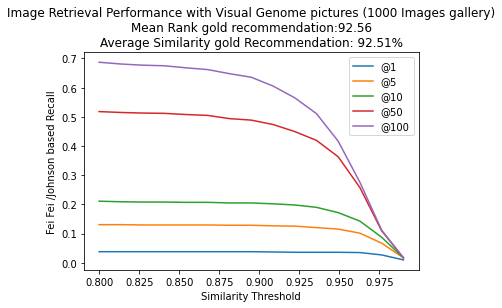

#########################################################################

GALLERY SIZE 5000.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_graph_query_feifei_johnson_recall.csv


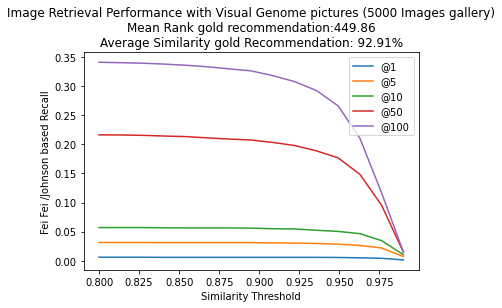

In [60]:
vg_graph_query = lambda gallery_size: f"vg_{gallery_size}_graph_query"


gallery_size_list = [50, 150, 1000, 5000]
query_type_list = [vg_graph_query(size) for size in gallery_size_list ]

for size in gallery_size_list:
    print("#########################################################################\n")
    query_type = vg_graph_query(size)
    print(f"GALLERY SIZE {size}.\n")
    title=f"Image Retrieval Performance with Visual Genome pictures ({size} Images gallery)"
    file_name = eval_name(query_type, fei_fei_recall)
    df = read_frame(file_name)
    plot_recall(df, y_label=feifei_recall_label, recall_list=[1, 5,  10, 50, 100], title=title)


## Remarks:
The model used to train the Image Retrieval System is based on the Causal TDE, MOTIFS Model, SUM Fusion Model trained by Kaihua Tang et al. (https://arxiv.org/pdf/2002.11949.pdf). 

The pipeline for the image retrieval part was partly incomplete, as the author missed to secure properly the corresponding code (See the author comment under https://github.com/KaihuaTang/Scene-Graph-Benchmark.pytorch/blob/master/maskrcnn_benchmark/image_retrieval/S2G-RETRIEVAL.md).

My pull request addresses many issues and make the running of the pipeline only a configuration topic. (https://github.com/KaihuaTang/Scene-Graph-Benchmark.pytorch/pull/156)

However, please note that I do not rely on the evaluation function the author published in github, as it was no using a normalized score to calculate the similarity between keys and queries.

We used a modified (corrected) version of this  to count the recall.

While the results differs, the mean rank values are on the same scale. I suspect the author made an error when reporting the values. They probably reported recall @10 and @50 instead of recall @50 and @100. The values they reported matches the values we observed for recall  @10 and @50 pretty well. If we assume the authors used a similar implementation of metrics to publish their results(but lost the end version...), then the slight difference in results can simply be explained by the randomness in the training (random negative samples during the training phase at each iteration for example)



| Image Retrieval (Sentence To Graph)                            |               |      |               |       |           |               |         |               |         |           |
|----------------------------------------------------------------|---------------|------|---------------|-------|-----------|---------------|---------|---------------|---------|-----------|
| Gallery                                                        |               | 1000 |               |       |           |               | 5000    |               |         |           |
| Recall @ in %                                                  | R@10          | R@20 | R@50          | R@100 | Mean Rank | R@10          | R@20    | R@50          | R@100   | Mean Rank |
| Reported Performance(Probably No Similarity Threshold applied) | Not Published | 17   | Not Published | 53.6  | 91        | Not Published | 5.2     | Not Published | 18.9    | 425       |
| Own Testing and Metrics(No Similarity Threshold applied)       | 21.1          | 31.4 | 52.1          | 69.2  | 92        | 5.7           | 10.6319 | 21.6          | 34.2227 | 449       |

In [58]:
q = vg_graph_query(1000)
file_name = eval_name(q, fei_fei_recall)
df = read_frame(file_name)
df.head(1)

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_graph_query_feifei_johnson_recall.csv


,recall_at_1,recall_at_2,recall_at_3,recall_at_4,recall_at_5,recall_at_10,recall_at_20,recall_at_50,recall_at_100,mean_rank,average_similarity,threshold
0,0.038229,0.061368,0.081489,0.109658,0.130785,0.211268,0.314889,0.521127,0.692153,92.564384,0.925145,NaN


In [57]:
q = vg_graph_query(5000)
file_name = eval_name(q, fei_fei_recall)
df = read_frame(file_name)
df.head(1)

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_graph_query_feifei_johnson_recall.csv


,recall_at_1,recall_at_2,recall_at_3,recall_at_4,recall_at_5,recall_at_10,recall_at_20,recall_at_50,recall_at_100,mean_rank,average_similarity,threshold
0,0.006018,0.015246,0.021063,0.026279,0.031294,0.056971,0.106319,0.21665,0.342227,449.85556,0.929087,NaN
